In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from collections import Counter
import graphviz

In [ ]:
#Declaring the columns of the dataframe.
col = ['Date','Time','CO_GT','PT08_S1_CO','NMHC_GT','C6H6_GT','PT08_S2_NMHC','NOX_GT','PT08_S3_NOX','NO2_GT','PT08_S4_NO2','PT08_S5_O3','T','RH','AH']

#list of integers that represent the indices of the columns.
use = list(np.arange(len(col)))

#sep = ';' specifies that the CSV file uses a semicolon (;) as the delimiter between values
#decimal = ',' specifies that the decimal separator in the file is a comma (,)
#header = None indicates that we are skipping the header row as we are specifying the column names manually in the col parameter.
#skiprows = 1 skips the first row of the CSV file when reading the data.
#names = col assigns the column names specified in the col list to the data frame's columns.
#na_values = -200 specifies that the value -200 in the CSV file should be treated as a NaN value in the data frame.
#na_filter = True enables filtering out missing or NaN values.
#usecols = use limits the columns to be read from the CSV file to those specified in the use list.
data = pd.read_csv('/content/Air_Quality.csv',sep = ';',decimal = ',', header = None, skiprows = 1, names = col, na_filter = True, na_values = -200, usecols = use)

data.head()

,Date,Time,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [ ]:
#Dropping the rows with all NaN values
# print(data.shape)
data.dropna(how='all',inplace=True)
# print(data.shape)

#Rows with at least 9 non-NaN values wont be dropped.
# print(data.shape[0]-data.count())
# print('\n')
data.dropna(thresh=9,axis=0,inplace=True)
# print(data.shape[0]-data.count())
# print(data.shape)

In [ ]:
# plt.plot(data.index,data['RH'])
# plt.show()
# plt.plot(data.index,data['NO2_GT'])
# plt.show()
# plt.plot(data.index,data['NOX_GT'])
# plt.show()
# plt.plot(data.index,data['NMHC_GT'])
# plt.show()

In [ ]:
#Seperating the hour from time
data['Hour'] = data['Time'].str.split('.').str[0].astype(int)

#Seperating the month from date
data['Month'] = data['Date'].str.split('/').str[1].astype(int)
data['Day'] = data['Date'].str.split('/').str[0].astype(int)
data['Year'] = data['Date'].str.split('/').str[2].astype(int)

#Changing the format of the date
data['Date'] = pd.to_datetime(data.Date, format='%d/%m/%Y')

In [ ]:
data.head()
data.dtypes

Date            datetime64[ns]
Time                    object
CO_GT                  float64
PT08_S1_CO             float64
NMHC_GT                float64
C6H6_GT                float64
PT08_S2_NMHC           float64
NOX_GT                 float64
PT08_S3_NOX            float64
NO2_GT                 float64
PT08_S4_NO2            float64
PT08_S5_O3             float64
T                      float64
RH                     float64
AH                     float64
Hour                     int64
Month                    int64
Day                      int64
Year                     int64
dtype: object

In [ ]:
data.drop('NMHC_GT',axis=1,inplace=True)
data.drop('Time',axis=1,inplace=True)
data.drop('Date',axis = 1,inplace=True)

In [ ]:
print('Missing values:\n',data.shape[0]-data.count())

Missing values:
 CO_GT           1647
PT08_S1_CO         0
C6H6_GT            0
PT08_S2_NMHC       0
NOX_GT          1595
PT08_S3_NOX        0
NO2_GT          1598
PT08_S4_NO2        0
PT08_S5_O3         0
T                  0
RH                 0
AH                 0
Hour               0
Month              0
Day                0
Year               0
dtype: int64


In [ ]:
data['CO_GT'] = data['CO_GT'].fillna(data.groupby(['Month','Hour'])['CO_GT'].transform('mean'))
data['NOX_GT'] = data['NOX_GT'].fillna(data.groupby(['Month','Hour'])['NOX_GT'].transform('mean'))
data['NO2_GT'] = data['NO2_GT'].fillna(data.groupby(['Month','Hour'])['NO2_GT'].transform('mean'))

In [ ]:
print('Missing values:\n',data.shape[0]-data.count())

Missing values:
 CO_GT            30
PT08_S1_CO        0
C6H6_GT           0
PT08_S2_NMHC      0
NOX_GT          261
PT08_S3_NOX       0
NO2_GT          261
PT08_S4_NO2       0
PT08_S5_O3        0
T                 0
RH                0
AH                0
Hour              0
Month             0
Day               0
Year              0
dtype: int64


In [ ]:
# Group the data by 'HOUR' and select the 'CO_GT' column
grouped_data = data.groupby(['Hour'])['CO_GT']

# Calculate the mean values for each 'HOUR' group
hourly_means = grouped_data.transform('mean')

# Fill missing values in the 'CO_GT' column with corresponding hourly means
data['CO_GT'].fillna(hourly_means, inplace=True)

grouped_data = data.groupby(['Hour'])['NOX_GT']
hourly_means = grouped_data.transform('mean')
data['NOX_GT'].fillna(hourly_means, inplace=True)

grouped_data = data.groupby(['Hour'])['NO2_GT']
hourly_means = grouped_data.transform('mean')
data['NO2_GT'].fillna(hourly_means, inplace=True)

In [ ]:
data.reset_index(drop=True, inplace=True)
print('Missing values:\n',data.shape[0]-data.count())

Missing values:
 CO_GT           0
PT08_S1_CO      0
C6H6_GT         0
PT08_S2_NMHC    0
NOX_GT          0
PT08_S3_NOX     0
NO2_GT          0
PT08_S4_NO2     0
PT08_S5_O3      0
T               0
RH              0
AH              0
Hour            0
Month           0
Day             0
Year            0
dtype: int64


In [ ]:
data

,CO_GT,PT08_S1_CO,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH,Hour,Month,Day,Year
0,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,18,3,10,2004
1,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,19,3,10,2004
2,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,20,3,10,2004
3,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,21,3,10,2004
4,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,22,3,10,2004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8986,3.1,1314.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568,10,4,4,2005
8987,2.4,1163.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119,11,4,4,2005
8988,2.4,1142.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406,12,4,4,2005
8989,2.1,1003.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139,13,4,4,2005


In [ ]:
data.drop('Year',axis = 1,inplace=True)
data.drop('Day',axis = 1,inplace=True)
data.drop('Month',axis = 1,inplace=True)
data.drop('Hour',axis = 1,inplace=True)
data.drop('T',axis = 1,inplace=True)

   CO_GT  PT08_S1_CO  C6H6_GT  PT08_S2_NMHC  NOX_GT  PT08_S3_NOX  NO2_GT  \
0    2.6      1360.0     11.9        1046.0   166.0       1056.0   113.0   
1    2.0      1292.0      9.4         955.0   103.0       1174.0    92.0   
2    2.2      1402.0      9.0         939.0   131.0       1140.0   114.0   
3    2.2      1376.0      9.2         948.0   172.0       1092.0   122.0   
4    1.6      1272.0      6.5         836.0   131.0       1205.0   116.0   

   PT08_S4_NO2  PT08_S5_O3    RH      AH  
0       1692.0      1268.0  48.9  0.7578  
1       1559.0       972.0  47.7  0.7255  
2       1555.0      1074.0  54.0  0.7502  
3       1584.0      1203.0  60.0  0.7867  
4       1490.0      1110.0  59.6  0.7888  


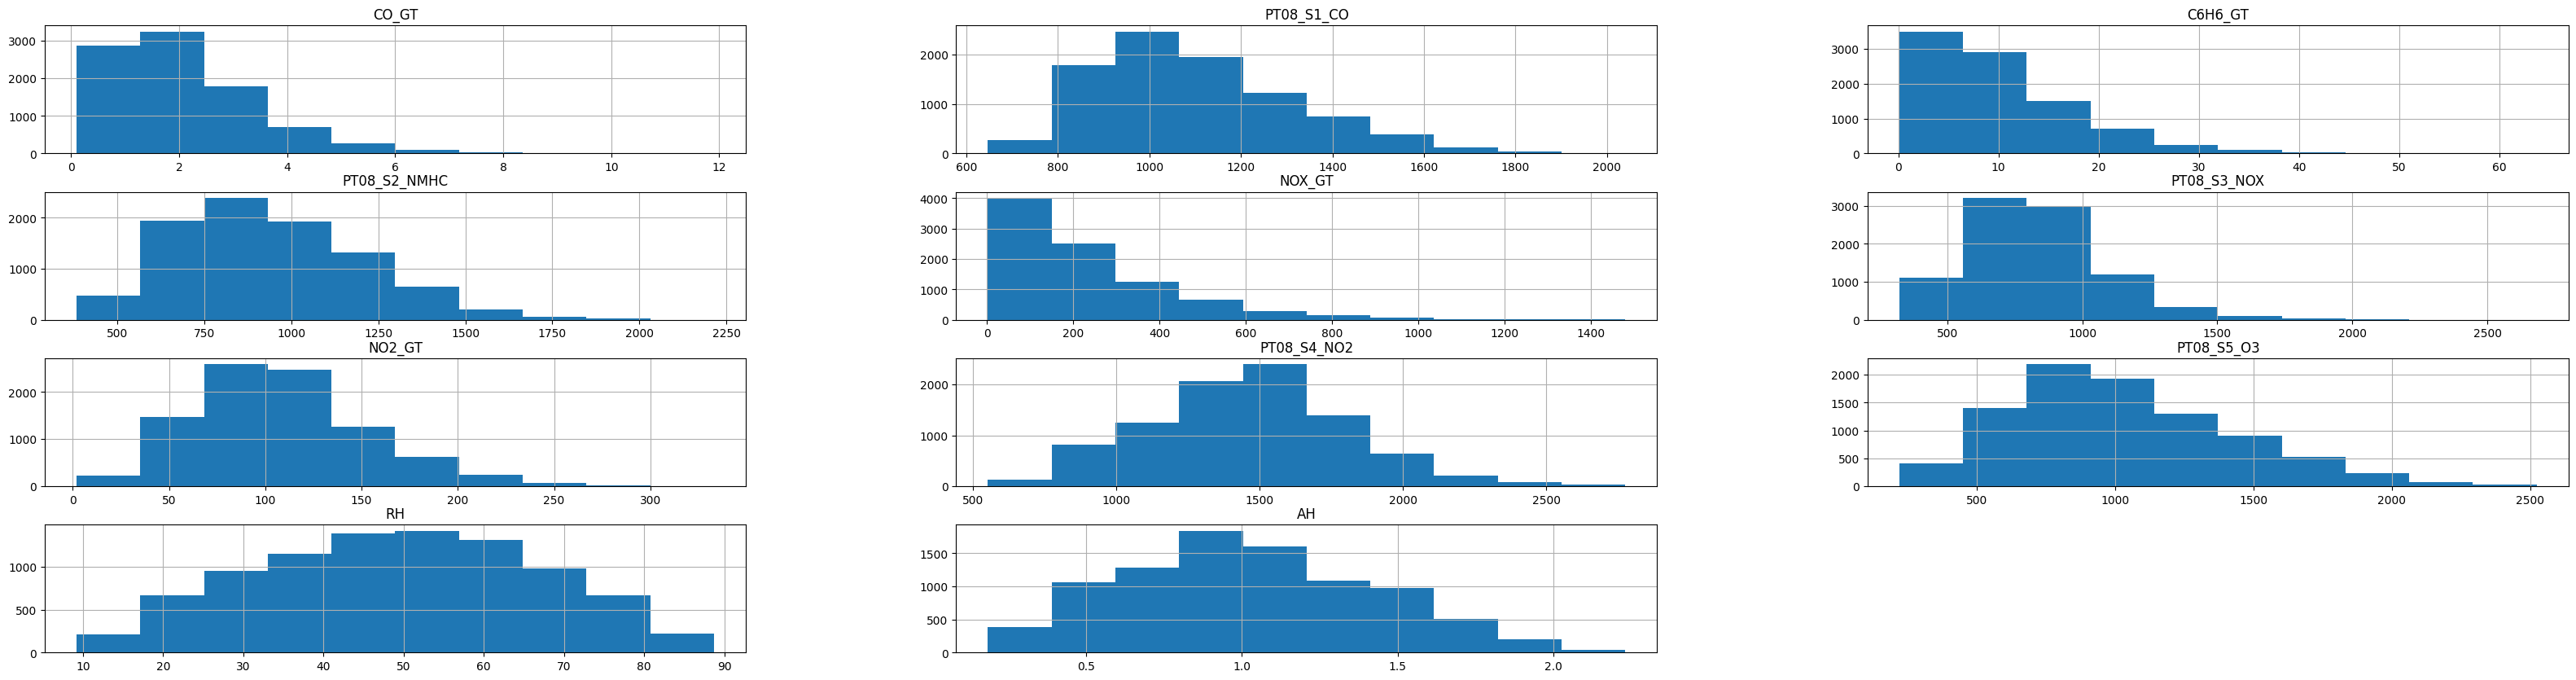

In [ ]:
print(data.head())
data.hist(figsize = (40,10))
plt.show()

In [ ]:
print(data.mean())
print(data.median())

CO_GT              2.087529
PT08_S1_CO      1099.833166
C6H6_GT           10.083105
PT08_S2_NMHC     939.153376
NOX_GT           235.628247
PT08_S3_NOX      835.493605
NO2_GT           108.192116
PT08_S4_NO2     1456.264598
PT08_S5_O3      1022.906128
RH                49.234201
AH                 1.025530
dtype: float64
CO_GT              1.8000
PT08_S1_CO      1063.0000
C6H6_GT            8.2000
PT08_S2_NMHC     909.0000
NOX_GT           170.0000
PT08_S3_NOX      806.0000
NO2_GT           104.0000
PT08_S4_NO2     1463.0000
PT08_S5_O3       963.0000
RH                49.6000
AH                 0.9954
dtype: float64


After considering the above observations,
we are setting the thresholds for the following:

CO_GT: 8

PT08_S1_CO: 1070

C6H6_GT: 9.1

PT08_S2_NMHC: 920

NOX_GT: 190

PT08_S3_NOX: 815

NO2_GT: 100

PT08_S4_NO2: 1460

PT08_S5_O3: 990

RH: 49.4

AH: 1.01

Using the above thresholds, discretisation of various attributes is done.


In [ ]:
temp = data.copy()
temp['CO_GT'] = data['CO_GT'].apply(lambda x: 1 if x >= 8 else 0)
temp['PT08_S1_CO'] = data['PT08_S1_CO'].apply(lambda x: 1 if x >= 1070 else 0)
temp['C6H6_GT'] = data['C6H6_GT'].apply(lambda x: 1 if x >= 9.1 else 0)
temp['PT08_S2_NMHC'] = data['PT08_S2_NMHC'].apply(lambda x: 1 if x >= 920 else 0)
temp['NOX_GT'] = data['NOX_GT'].apply(lambda x: 1 if x >= 190 else 0)
temp['PT08_S3_NOX'] = data['PT08_S3_NOX'].apply(lambda x: 1 if x >= 815 else 0)
temp['NO2_GT'] = data['NO2_GT'].apply(lambda x: 1 if x >= 100 else 0)
temp['PT08_S4_NO2'] = data['PT08_S4_NO2'].apply(lambda x: 1 if x >= 1460 else 0)
temp['PT08_S5_O3'] = data['PT08_S5_O3'].apply(lambda x: 1 if x >= 990 else 0)
temp['RH'] = data['RH'].apply(lambda x: 1 if x >= 49.4 else 0)
temp['AH'] = data['AH'].apply(lambda x: 1 if x >= 1.01 else 0)
print(data.head())
print(temp.head())

   CO_GT  PT08_S1_CO  C6H6_GT  PT08_S2_NMHC  NOX_GT  PT08_S3_NOX  NO2_GT  \
0    2.6      1360.0     11.9        1046.0   166.0       1056.0   113.0   
1    2.0      1292.0      9.4         955.0   103.0       1174.0    92.0   
2    2.2      1402.0      9.0         939.0   131.0       1140.0   114.0   
3    2.2      1376.0      9.2         948.0   172.0       1092.0   122.0   
4    1.6      1272.0      6.5         836.0   131.0       1205.0   116.0   

   PT08_S4_NO2  PT08_S5_O3    RH      AH  
0       1692.0      1268.0  48.9  0.7578  
1       1559.0       972.0  47.7  0.7255  
2       1555.0      1074.0  54.0  0.7502  
3       1584.0      1203.0  60.0  0.7867  
4       1490.0      1110.0  59.6  0.7888  
   CO_GT  PT08_S1_CO  C6H6_GT  PT08_S2_NMHC  NOX_GT  PT08_S3_NOX  NO2_GT  \
0      0           1        1             1       0            1       1   
1      0           1        1             1       0            1       0   
2      0           1        0             1       0      

In [ ]:
print((temp['AH']==1).sum())
print((temp['CO_GT']==1).sum())
print((temp['PT08_S1_CO']==1).sum())
print((temp['C6H6_GT']==1).sum())
print((temp['PT08_S2_NMHC']==1).sum())
print((temp['NOX_GT']==1).sum())
print((temp['PT08_S3_NOX']==1).sum())
print((temp['NO2_GT']==1).sum())
print((temp['PT08_S4_NO2']==1).sum())
print((temp['PT08_S5_O3']==1).sum())
print((temp['RH']==1).sum())

4361
30
4395
4067
4356
4087
4369
4839
4531
4256
4533


In [ ]:
data['AQI'] = temp.sum(axis = 1)
data['AQI'] = data['AQI'].apply(lambda x : 1 if x >= data.shape[1]-3 else 0)
data.head()

,CO_GT,PT08_S1_CO,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,RH,AH,AQI
0,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,48.9,0.7578,0
1,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,47.7,0.7255,0
2,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,54.0,0.7502,0
3,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,60.0,0.7867,0
4,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,59.6,0.7888,0


In [ ]:
print((data['AQI']==1).sum())

607


In [ ]:
Y = data['AQI']
X = data.drop(['AQI'],axis = 1)
Y = Y.values
X = X.values

def split_data(X,Y,test_size = 0.2,random_state = 0):
  np.random.seed(random_state)
  test_size = int(test_size * len(X))
  indices = np.arange(X.shape[0])
  random.shuffle(indices)

  train_indices = indices[test_size:]
  test_indices = indices[:test_size]
  X_train = [X[i] for i in train_indices]
  Y_train = [Y[i] for i in train_indices]
  X_test = [X[i] for i in test_indices]
  Y_test = [Y[i] for i in test_indices]
  return np.asarray(X_train), np.asarray(X_test), np.asarray(Y_train), np.asarray(Y_test)

X_train, X_test, Y_train, Y_test = split_data( X, Y, test_size = 0.2, random_state = 0 )

Perceptron

In [ ]:
def step_function(x):
    return 1 if x >= 0 else 0

def predict(weights,bias,x):
  return step_function(np.dot(x,weights)+bias)


def accuracy(Y_test, Y_pred):
    return np.sum(Y_test == Y_pred) / len(Y_test)

def fit(x, y, learning_rate, epochs):
    num_features = x.shape[1]
    weights = np.zeros(num_features)
    bias = 0

    for i in range(epochs):
        for j in range(x.shape[0]):
            z = np.dot(x[j], weights) + bias
            y_pred = step_function(z)

            weights = weights + learning_rate * (y[j] - y_pred) * x[j]
            bias = bias + learning_rate * (y[j] - y_pred)

    return weights, bias

weights, bias = fit(X_train, Y_train, 0.01, 500)

predi = []
for i in range(X_test.shape[0]):
  predi.append(predict(weights,bias,X_test[i]))
predi = np.array(predi)

ac = accuracy(Y_test,predi)
print(ac)

0.9382647385984427


Fisher lda

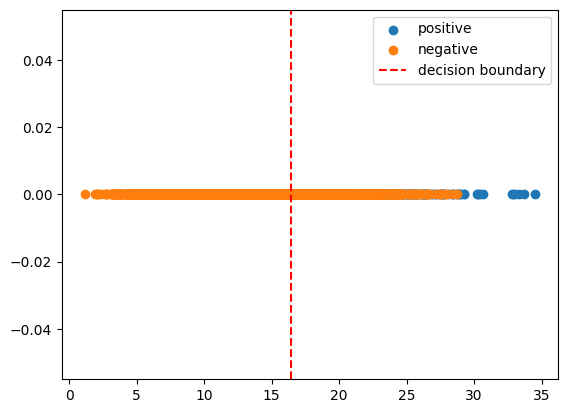

0.8370411568409344


In [ ]:
def accuracy(Y_test, Y_pred):
    return np.sum(Y_test == Y_pred) / len(Y_test)

mu_pos = np.mean(X_train[Y_train == 1], axis=0)
mu_neg = np.mean(X_train[Y_train == 0], axis=0)

sigma_pos = np.std(X_train[Y_train == 1], axis=0)
sigma_neg = np.std(X_train[Y_train == 0], axis=0)

Sw = (np.square(sigma_pos) + np.square(sigma_neg)) / 2
w = (mu_pos - mu_neg) / Sw
w = w / np.linalg.norm(w)

X_train_lda = np.dot(X_train, w)
mu_pos_lda = np.mean(X_train_lda[Y_train == 1])
mu_neg_lda = np.mean(X_train_lda[Y_train == 0])

sigma_pos_lda = np.std(X_train_lda[Y_train == 1])
sigma_neg_lda = np.std(X_train_lda[Y_train == 0])

threshold = (mu_pos_lda + mu_neg_lda) / 2

plt.scatter(X_train_lda[Y_train == 1], np.zeros_like(X_train_lda[Y_train == 1]), label='positive')
plt.scatter(X_train_lda[Y_train == 0], np.zeros_like(X_train_lda[Y_train == 0]), label='negative')

plt.axvline(x=threshold, color='red', linestyle='--', label='decision boundary')
plt.legend()
plt.show()

X_test_lda = np.dot(X_test, w)
Y_pred = (X_test_lda >= threshold).astype(int)
ac = accuracy(Y_test,Y_pred)
print(ac)

Random Forest

In [ ]:
class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, *, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

    def is_leaf_node(self):
        return self.value is not None

class DecisionTree:
    def __init__(self, min_samples_split=2, max_depth=100, n_features=None):
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.n_features = n_features
        self.root = None

    def fit(self, X, y):
        self.n_features = X.shape[1] if not self.n_features else min(X.shape[1], self.n_features)
        self.root = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_feats = X.shape
        n_labels = len(np.unique(y))

        if depth >= self.max_depth or n_labels == 1 or n_samples < self.min_samples_split:
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        feat_idxs = np.random.choice(n_feats, self.n_features, replace=False)
        best_feature, best_thresh = self._best_split(X, y, feat_idxs)

        left_idxs, right_idxs = self._split(X[:, best_feature], best_thresh)
        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth + 1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth + 1)
        return Node(best_feature, best_thresh, left, right)

    def _best_split(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_threshold = None, None

        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)

            for thr in thresholds:
                gain = self._information_gain(y, X_column, thr)

                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_threshold = thr

        return split_idx, split_threshold

    def _information_gain(self, y, X_column, threshold):
        parent_entropy = self._entropy(y)
        left_idx, right_idx = self._split(X_column, threshold)
        if len(left_idx) == 0 or len(right_idx) == 0:
            return 0
        n = len(y)
        n_l, n_r = len(left_idx), len(right_idx)
        e_l, e_r = self._entropy(y[left_idx]), self._entropy(y[right_idx])
        child_entropy = (n_l / n) * e_l + (n_r / n) * e_r

        information_gain = parent_entropy - child_entropy
        return information_gain

    def _split(self, X_column, split_thresh):
        left_idx = np.argwhere(X_column <= split_thresh).flatten()
        right_idx = np.argwhere(X_column > split_thresh).flatten()
        return left_idx, right_idx

    def _entropy(self, y):
        hist = np.bincount(y)
        ps = hist / len(y)
        return -np.sum([p * np.log(p) for p in ps if p > 0])

    def _most_common_label(self, y):
        counter = Counter(y)
        most_common = counter.most_common(1)[0][0]
        return most_common

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)

class RandomForest:
    def __init__(self, n_trees=10, max_depth=10, min_samples_split=2, n_features=None):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.n_features = n_features
        self.trees = []

    def fit(self, X, y):
        self.trees = []
        for _ in range(self.n_trees):
            tree = DecisionTree(min_samples_split=self.min_samples_split, max_depth=self.max_depth, n_features=self.n_features)
            X_sample, y_sample = self._bootstrap_samples(X, y)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def _bootstrap_samples(self, X, y):
        n_samples = X.shape[0]
        idxs = np.random.choice(n_samples, n_samples, replace=True)
        return X[idxs], y[idxs]

    def _most_common_label(self, y):
        counter = Counter(y)
        most_common = counter.most_common(1)[0][0]
        return most_common

    def predict(self, X):
        predictions = np.array([tree.predict(X) for tree in self.trees])
        tree_preds = np.swapaxes(predictions, 0, 1)
        predictions = np.array([self._most_common_label(pred) for pred in tree_preds])
        return predictions

rf = RandomForest()
rf.fit(X_train, Y_train)
predictions = rf.predict(X_test)

def accuracy(Y_test, Y_pred):
    return np.sum(Y_test == Y_pred) / len(Y_test)

acc = accuracy(Y_test, predictions)
print("Accuracy:", acc)

Accuracy: 0.996662958843159


XGBoost

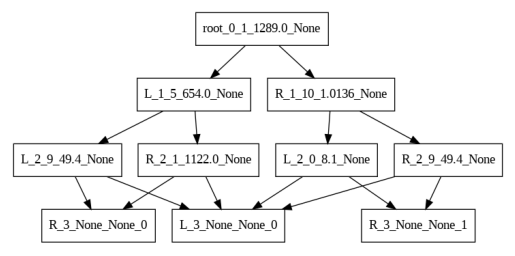

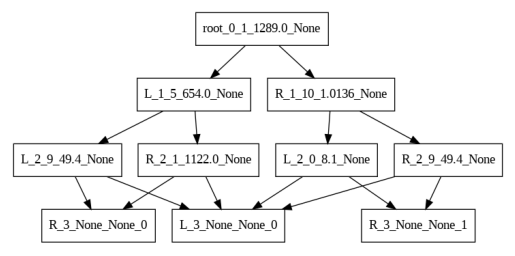

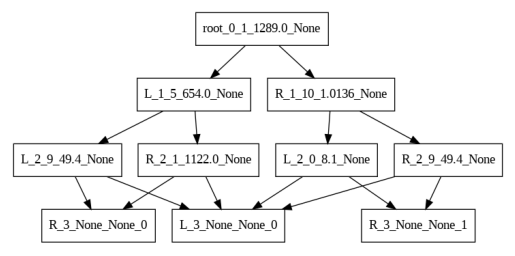

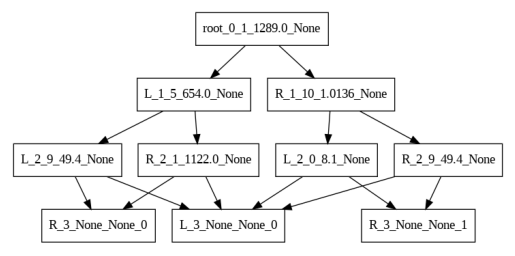

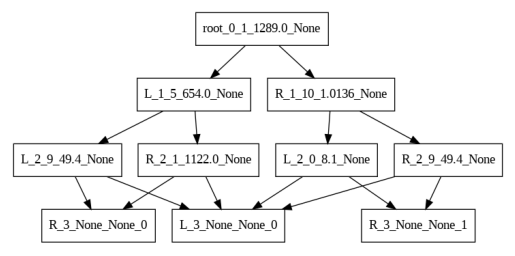

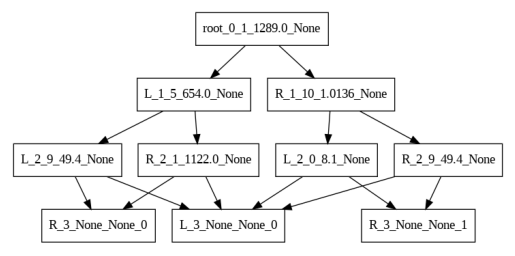

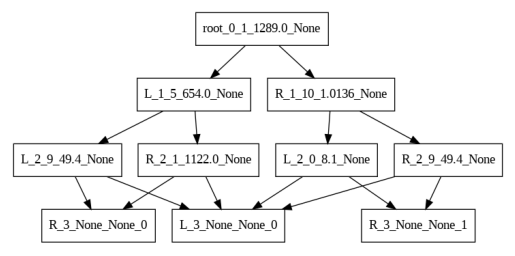

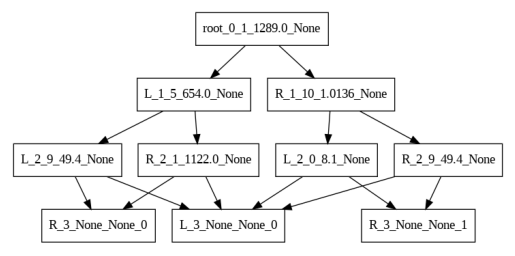

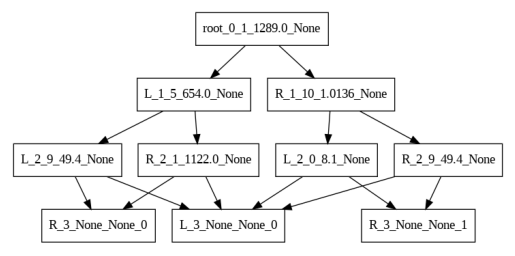

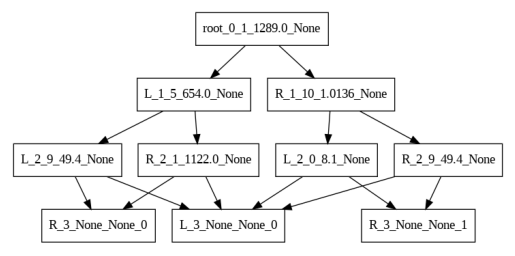

0.9660734149054505


In [ ]:
class Node:
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, value=None):
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

class DecisionTree:
    def __init__(self, max_depth=2):
        self.max_depth = max_depth

    def fit(self, X, y, j):
        self.n_classes = len(np.unique(y))
        self.n_features = X.shape[1]
        self.tree = self._grow_tree(X, y)
        graph = self.plot_tree(self.tree)
        s = str(j)
        graph.render(filename='decision_tree'+s, format='png', cleanup=True)

        # Display the plot
        img_path = 'decision_tree'+s+'.png'
        img = plt.imread(img_path)
        plt.imshow(img)
        plt.axis('off')
        plt.show()

    def _grow_tree(self, X, y, depth=0):
        if (depth >= self.max_depth) or (len(np.unique(y)) == 1):
            return Node(value=self._most_common_label(y))

        feature_index, threshold = self._best_split(X, y)
        left_indices, right_indices = self._split(X[:, feature_index], threshold)

        left = self._grow_tree(X[left_indices, :], y[left_indices], depth + 1)
        right = self._grow_tree(X[right_indices, :], y[right_indices], depth + 1)

        return Node(feature_index, threshold, left, right)

    def _best_split(self, X, y):
        best_gini = 1
        best_feature, best_threshold = None, None

        for feature_index in range(self.n_features):
            thresholds = np.unique(X[:, feature_index])
            for threshold in thresholds:
                left_indices, right_indices = self._split(X[:, feature_index], threshold)
                if len(left_indices) == 0 or len(right_indices) == 0:
                    continue

                gini = self._gini_impurity(y, left_indices, right_indices)
                if gini < best_gini:
                    best_gini = gini
                    best_feature = feature_index
                    best_threshold = threshold

        return best_feature, best_threshold

    def _split(self, feature, threshold):
        left_indices = np.where(feature < threshold)[0]
        right_indices = np.where(feature >= threshold)[0]
        return left_indices, right_indices

    def _gini_impurity(self, y, left_indices, right_indices):
        left_gini = self._gini(y[left_indices])
        right_gini = self._gini(y[right_indices])
        total_samples = len(left_indices) + len(right_indices)
        return (len(left_indices) / total_samples) * left_gini + (len(right_indices) / total_samples) * right_gini

    def _gini(self, y):
        if len(y) == 0:
            return 0
        values,counts = np.unique(y,return_counts = True)


        probabilities =  counts/ len(y)
        return 1 - np.sum(probabilities ** 2)

    def _most_common_label(self, y):
        values,counts = np.unique(y,return_counts = True)

        return counts.argmax()

    def predict(self, X):
        return [self._predict_tree(x, self.tree) for x in X]

    def _predict_tree(self, x, node):
        if node.value is not None:
            return node.value

        if x[node.feature_index] < node.threshold:
            return self._predict_tree(x, node.left)
        else:
            return self._predict_tree(x, node.right)
    def plot_tree(self,node, graph=None, parent_name=None, side='root', depth=0):
        if graph is None:
            graph = graphviz.Digraph(format='png')
            graph.attr('node', shape='box')

        name = f"{side}_{depth}_{str(node.feature_index)}_{str(node.threshold)}_{str(node.value)}"

        if parent_name is not None:
            graph.edge(parent_name, name)

        if node.left is not None:
            self.plot_tree(node.left, graph, name, 'L', depth + 1)

        if node.right is not None:
            self.plot_tree(node.right, graph, name, 'R', depth + 1)

        return graph

class XGBoostClassifier:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=2):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.trees = []

    def fit(self, X, y):
        y_pred = np.zeros(len(y))
        prevsum = 0

        for i in range(self.n_estimators):
            residuals = self._compute_residuals(y, y_pred)
            tree = DecisionTree(max_depth=self.max_depth)
            tree.fit(X, residuals, i)
            self.trees.append(tree)
            update = tree.predict(X)
            update = np.array(update)

            y_pred += self.learning_rate * update
            if i == 0:
              prevsum = np.sum(y-y_pred)
            else:
              if prevsum > abs(np.sum(y-y_pred)):
                prevsum = abs(np.sum(y-y_pred))
              else:
                self.trees.pop()
                break


    def predict(self, X):
        y_pred = np.zeros(X.shape[0])
        for tree in self.trees:
            update = tree.predict(X)
            update = np.array(update)
            y_pred += self.learning_rate * update
        return np.round(y_pred)

    def _compute_residuals(self, y, y_pred):
        return y - y_pred

clf = XGBoostClassifier(n_estimators=10, learning_rate=0.1, max_depth=3)
clf.fit(X_train, Y_train)
predictions = clf.predict(X_test)

predictions = np.array(predictions)
correct_predictions = np.sum(Y_test == predictions)
ac = correct_predictions / len(Y_test)
print(ac)